In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# load the data
df = pd.read_csv('data/mushrooms.csv')

In [33]:
# There are no null columns in the dataset
df[df.isnull().any(axis=1)]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat


In [34]:
from sklearn.model_selection import train_test_split


# split the data int x(training data) and y (results)
y = df['class']
x = df.drop(['class'], axis=1)
x = pd.get_dummies(x)
y = pd.get_dummies(y)
x.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
e    8124 non-null uint8
p    8124 non-null uint8
dtypes: uint8(2)
memory usage: 15.9 KB


In [35]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[9,10,11,12],
              'class_weight':('balanced', None),
              'presort':(False,True),
             }


tr = tree.DecisionTreeClassifier()
gsearch = GridSearchCV(tr, parameters)
gsearch.fit(X_train, y_train)
model = gsearch.best_estimator_
model


DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

In [37]:
# score = model.score(X_test, y_test)
# score
print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 1.000


In [38]:
# tr = DecisionTreeClassifier(max_depth=4, random_state=0)
# gsearch = GridSearchCV(tr, parameters)
# gsearch.fit(X_train, y_train)
# model = gsearch.best_estimator_
# model

# print("훈련 세트 정확도: {:.3f}".format(model.score(X_train, y_train)))
# print("테스트 세트 정확도: {:.3f}".format(model.score(X_test, y_test)))

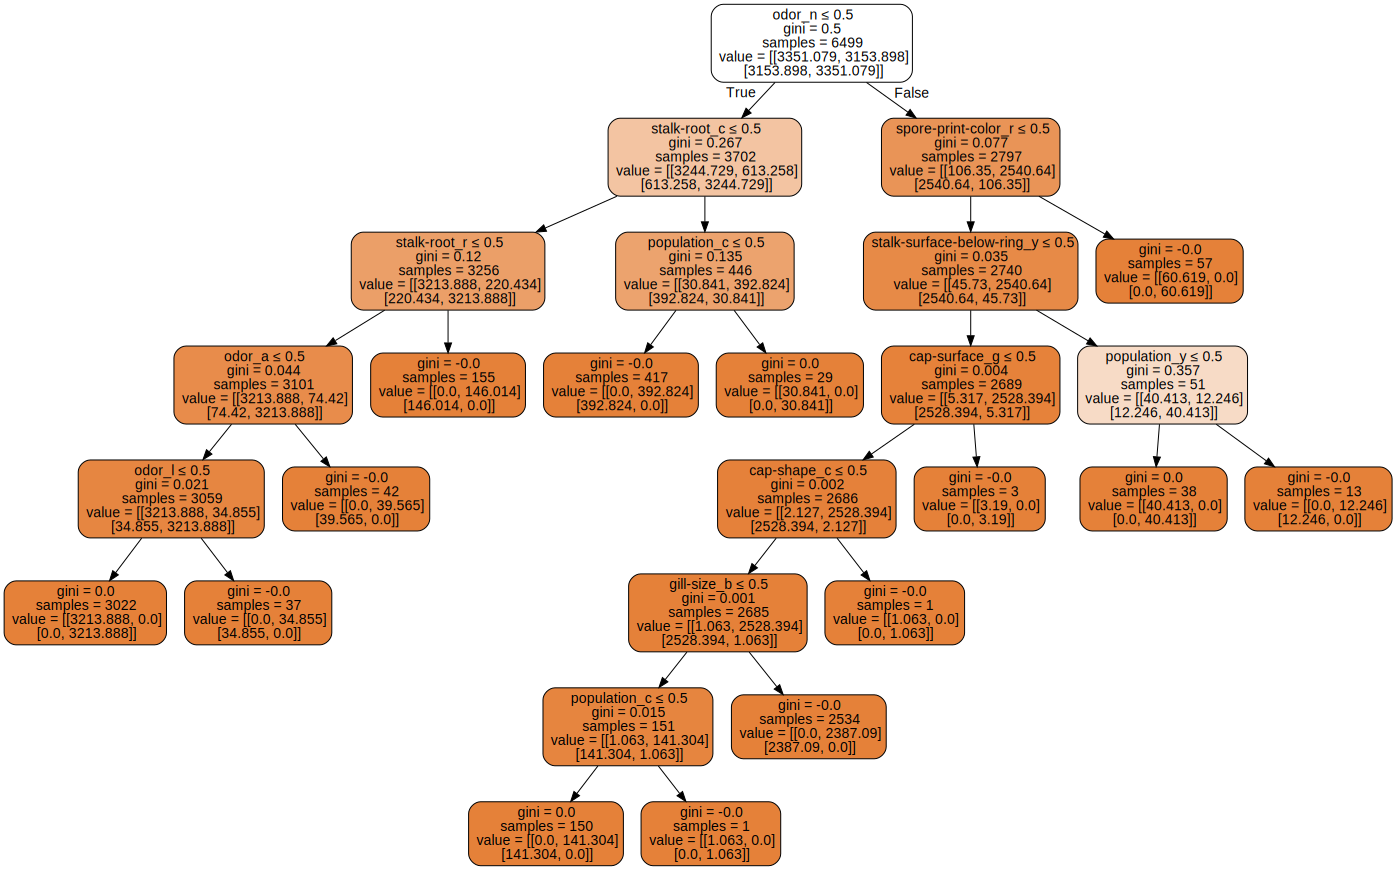

In [40]:
import graphviz

dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X_test.columns,
                               class_names=["Edible", "Poison"],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [17]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[0.         0.00065374 0.         0.         0.         0.
 0.         0.00195791 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00064967 0.02354499 0.
 0.         0.02122231 0.         0.61972457 0.         0.
 0.         0.         0.         0.         0.         0.0057891
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.17288465
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.10079491 0.         0.01760041
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

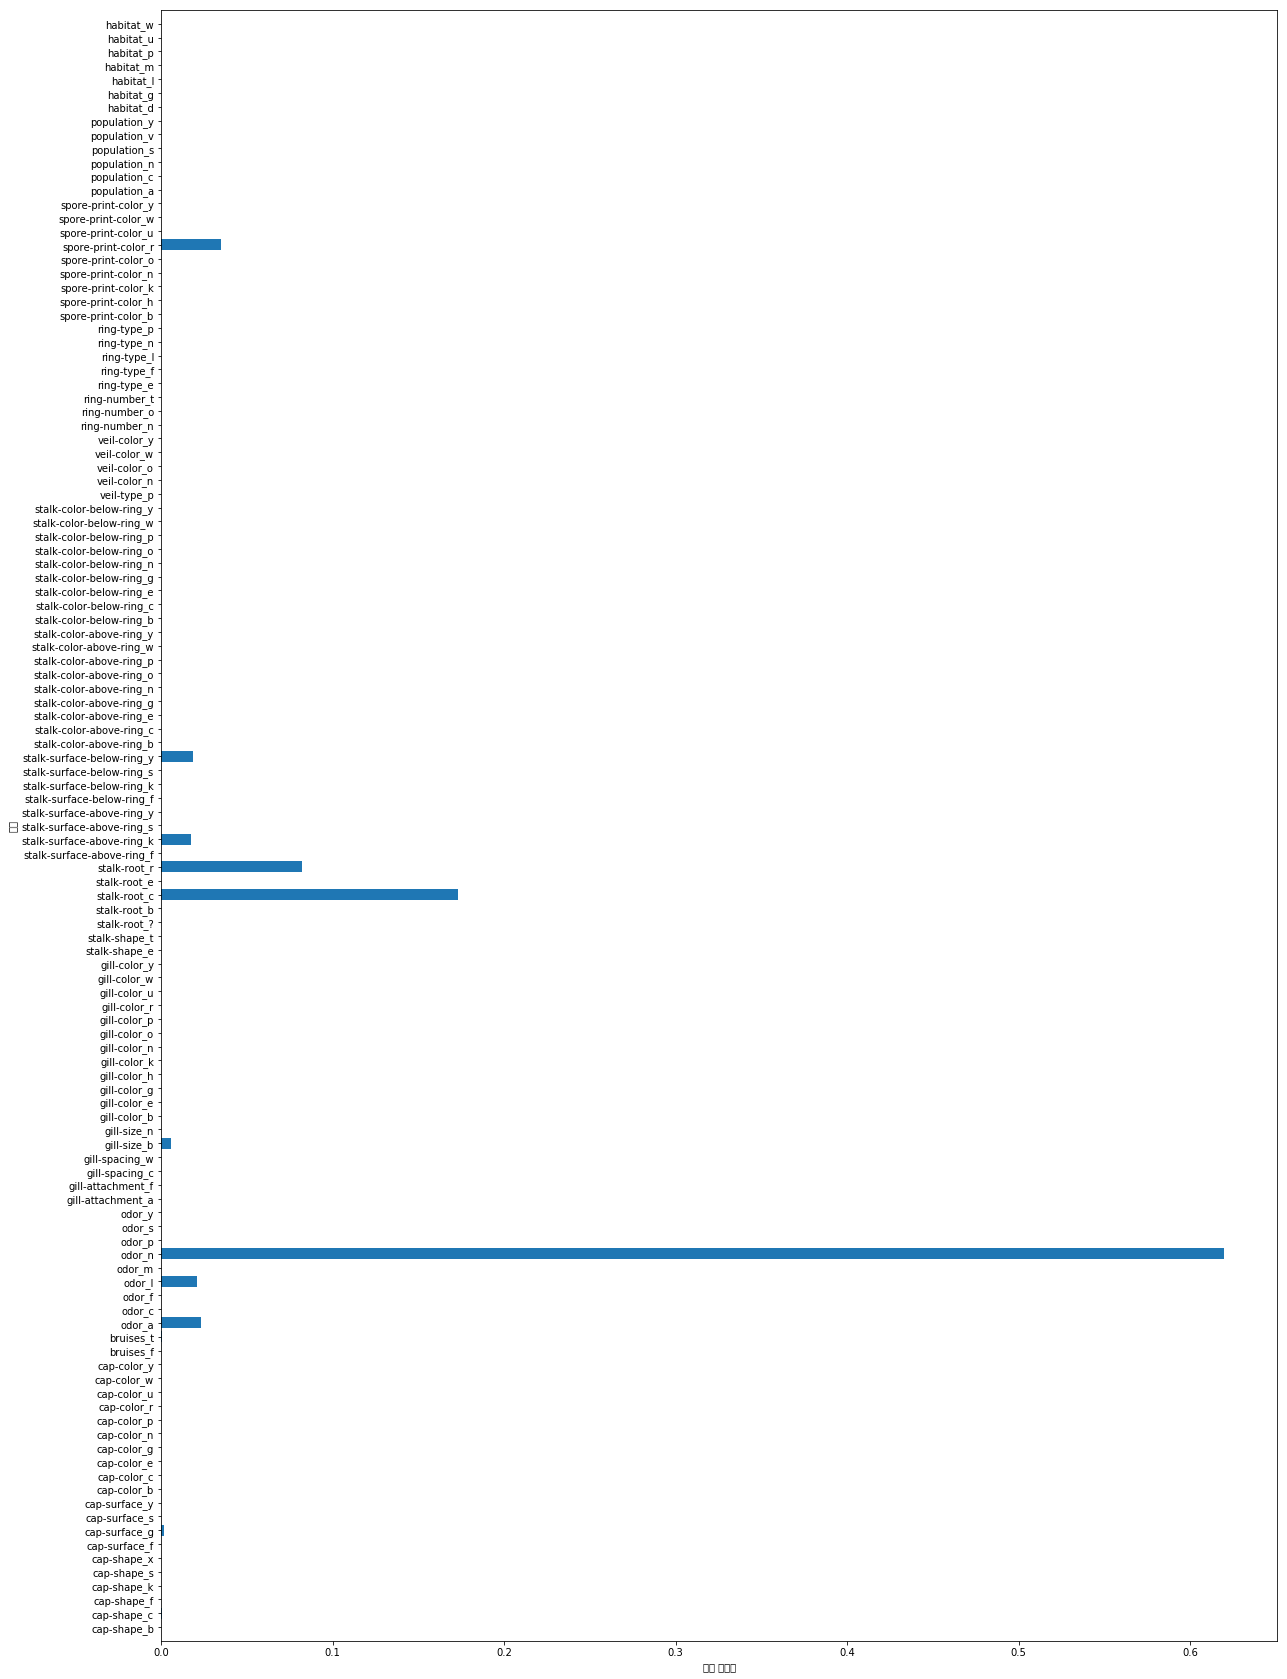

In [25]:
def plot_feature_importances_mushroom(model):
    n_features = x.shape[1]
    plt.figure(figsize=(20, 30))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_test.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
    
    
plot_feature_importances_mushroom(model)

Feature importances: [0. 1.]


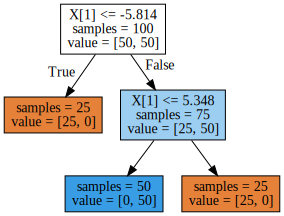

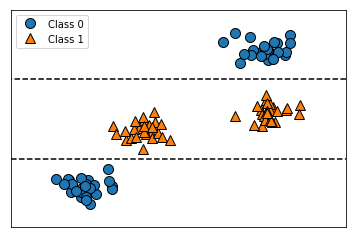

In [27]:
import mglearn

tree = mglearn.plots.plot_tree_not_monotone()
display(tree)